<h1>06. Final project </h1>
<br>

In this notebook, we will complete an end-to-end data visualization project and learn how we can use visualization to solve real-world problems. 

<p class="lead"> 
Table of Contents: 

- <a href="#Come-up-with-questions">Come up with questions</a>
- <a href="#Find-data">Find data</a>    
- <a href="#Refine-questions">Refine your questions</a>
- <a href="#Data-cleaning">Data cleaning</a>
- <a href="#Data-exploration-and-visualization">Data exploration and visualization</a>

    
</p>





<div>
<h2 class="breadcrumb">Come up with questions</h2><p>
</div>

- What excites you? What kind of problems would you like to explore and solve with data visualization?

![](assets/UFO1.gif)

![UFO](assets/UFO01.gif)

<div>
<h2 class="breadcrumb">Find data</h2><p>
</div>

- Google
- Find public datasets (e.g., https://www.kaggle.com/datasets/) 
- Use API (e.g., Twitter API)
- Web scraping 
- Survey


UFO data: https://www.kaggle.com/datasets/NUFORC/ufo-sightings

<div>
<h2 class="breadcrumb">Refine questions</h2><p>
</div>

Given the data we see, we can refine our questions:

- What is the yearly/monthly/daily trend of UFO sightings? Which year/month of the year/day of the month has the highest number of UFO sightings?
- Which country has the highest number of UFO sightings?
- Are there overall trend differences by country?

<div>
<h2 class="breadcrumb">Data cleaning</h2><p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('scrubbed.csv', low_memory=False)

In [3]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [5]:
# rename column "longitude " to "longitude". There is an extra space. 
df = df.rename(columns={"longitude ": "longitude"})

In [6]:
# check data types
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [7]:
# convert duration to float 
# df['duration (seconds)'] = df['duration (seconds)'].astype(float)

In [8]:
# found an issue with data
df[df['duration (seconds)']=='2`']

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
27822,2/2/2000 19:33,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2/16/2000,33.9325000,-114.005


In [9]:
# clean up duration 
df['duration (seconds)'] = df['duration (seconds)'].str.strip('`')

In [10]:
# convert duration to float 
df['duration (seconds)'] = df['duration (seconds)'].astype(float)

In [11]:
# convert latitude to float 
# df['latitude'] = df['latitude'].astype(float)

In [12]:
# found an issue with data
df[df.latitude=='33q.200088']

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
43782,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,33q.200088,-105.624152


In [13]:
# check data
df.iloc[43780: 43786]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
43780,5/2/2014 22:40,iron gate,va,us,light,180.0,3 minutes,3 fiery orange lights in formation maneuvering...,5/8/2014,37.7975000,-79.791389
43781,5/2/2014 22:45,parma,oh,us,fireball,40.0,30-40 seconds,Round orange red fireball over Parma.,5/8/2014,41.4047222,-81.723056
43782,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,33q.200088,-105.624152
43783,5/22/1977 20:00,marana,az,us,sphere,3600.0,60 min ??,That&#39s NOT the moon&#33,9/29/2004,32.4366667,-111.224722
43784,5/22/1980 02:00,little rock,ar,us,unknown,15.0,15 seconds,Bright intense light awoke us at 2:00 am in Li...,4/16/2005,34.7463889,-92.289444
43785,5/22/1990 23:00,perl island (private),ak,NaN,sphere,2100.0,two @ 35minea,The ship hovered over our runway twice for 35 ...,3/2/2004,59.119149,-151.688170


In [34]:
# df.iloc[43782-2:43782+3]

In [14]:
# check rows with latitude containing string q 
df[df['latitude'].str.contains('q')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
43782,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,33q.200088,-105.624152


In [15]:
# clean up latitude
df['latitude'] = df['latitude'].str.replace('q','')

In [16]:
# convert latitude to float
df['latitude'] = df['latitude'].astype(float)

In [17]:
# convert datetime to pandas datetime object 
# df['datetime'] = pd.to_datetime(df['datetime'])

In [18]:
# found an issue 
df[df['datetime']=='10/11/2006 24:00']

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
388,10/11/2006 24:00,rome,ny,us,oval,120.0,a min or two,I was walking from the garage to the house&#44...,2/1/2007,43.212778,-75.456111


In [19]:
# clean up datetime
df['datetime'] = df['datetime'].str.replace('24:00','23:59')

In [20]:
# convert datetime to pandas datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

In [21]:
# create variables year, month, day 
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

In [22]:
# check data types again
df.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)             float64
duration (hours/min)            object
comments                        object
date posted                     object
latitude                       float64
longitude                      float64
year                             int64
month                            int64
day                              int64
dtype: object

In [35]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,month,day
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949,10,10
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949,10,10
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955,10,10
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956,10,10
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960,10,10


<div>
<h2 class="breadcrumb">Data exploration and visualization</h2><p>
</div>

### What is the overall trend of UFO sightings over time?

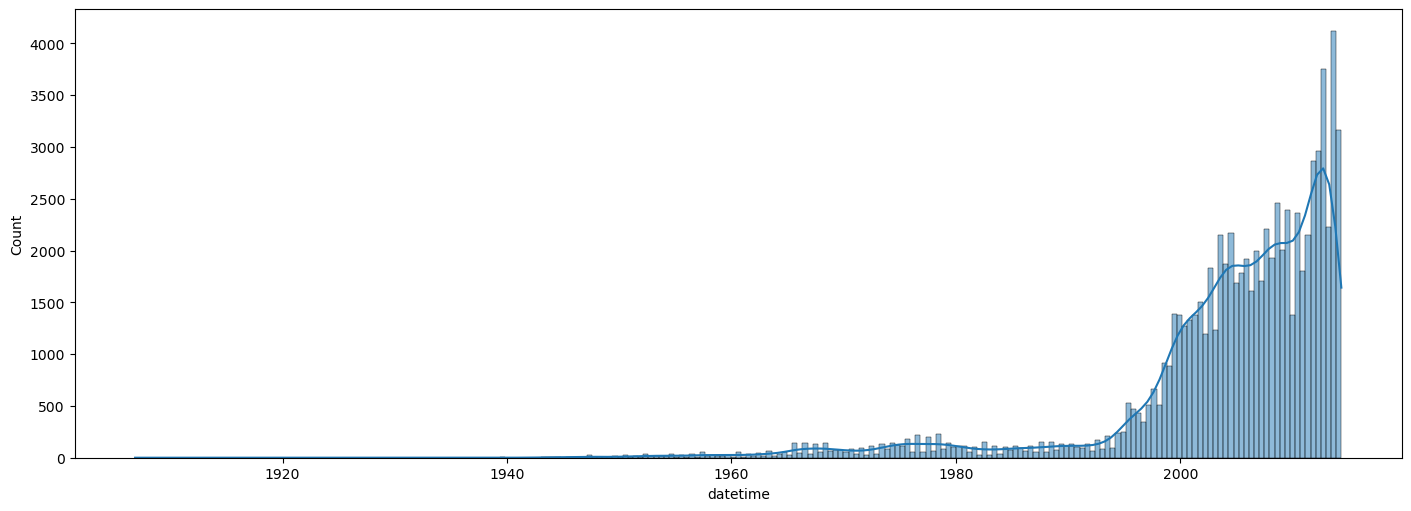

In [42]:
fig, ax = plt.subplots(figsize=(14,5), constrained_layout=True)
sns.histplot(data=df, x='datetime', kde=True);

### Which year has the highest number of UFO sightings?

In [43]:
df.year.value_counts()

2012    7357
2013    7037
2011    5107
2008    4820
2009    4541
        ... 
1920       1
1916       1
1906       1
1925       1
1934       1
Name: year, Length: 87, dtype: int64

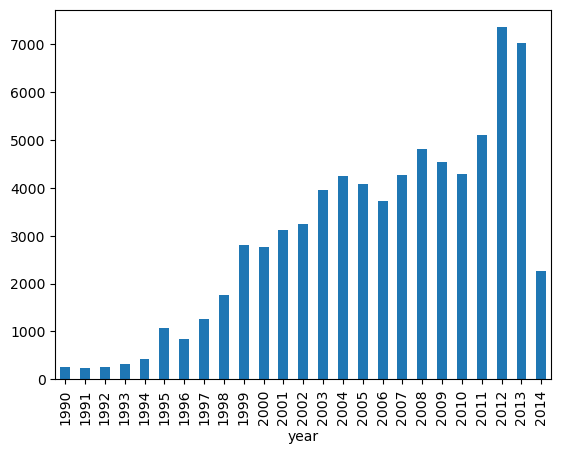

In [71]:
df[df['year']>1989].groupby('year')['datetime'].count().plot(kind='bar');

In [61]:
for y, v in df.groupby('year')['datetime'].count().items():
    print(f'{y}: {v}')

1906: 1
1910: 2
1916: 1
1920: 1
1925: 1
1929: 1
1930: 1
1931: 2
1933: 1
1934: 1
1936: 2
1937: 2
1939: 3
1941: 1
1942: 2
1943: 9
1944: 9
1945: 9
1946: 10
1947: 37
1948: 8
1949: 16
1950: 28
1951: 20
1952: 49
1953: 33
1954: 53
1955: 32
1956: 45
1957: 72
1958: 47
1959: 50
1960: 66
1961: 48
1962: 73
1963: 86
1964: 88
1965: 188
1966: 193
1967: 188
1968: 220
1969: 155
1970: 147
1971: 130
1972: 158
1973: 226
1974: 273
1975: 319
1976: 279
1977: 268
1978: 335
1979: 245
1980: 246
1981: 164
1982: 183
1983: 153
1984: 186
1985: 218
1986: 193
1987: 223
1988: 241
1989: 251
1990: 259
1991: 234
1992: 252
1993: 309
1994: 421
1995: 1078
1996: 834
1997: 1255
1998: 1767
1999: 2805
2000: 2772
2001: 3122
2002: 3235
2003: 3962
2004: 4257
2005: 4083
2006: 3721
2007: 4269
2008: 4820
2009: 4541
2010: 4283
2011: 5107
2012: 7357
2013: 7037
2014: 2260


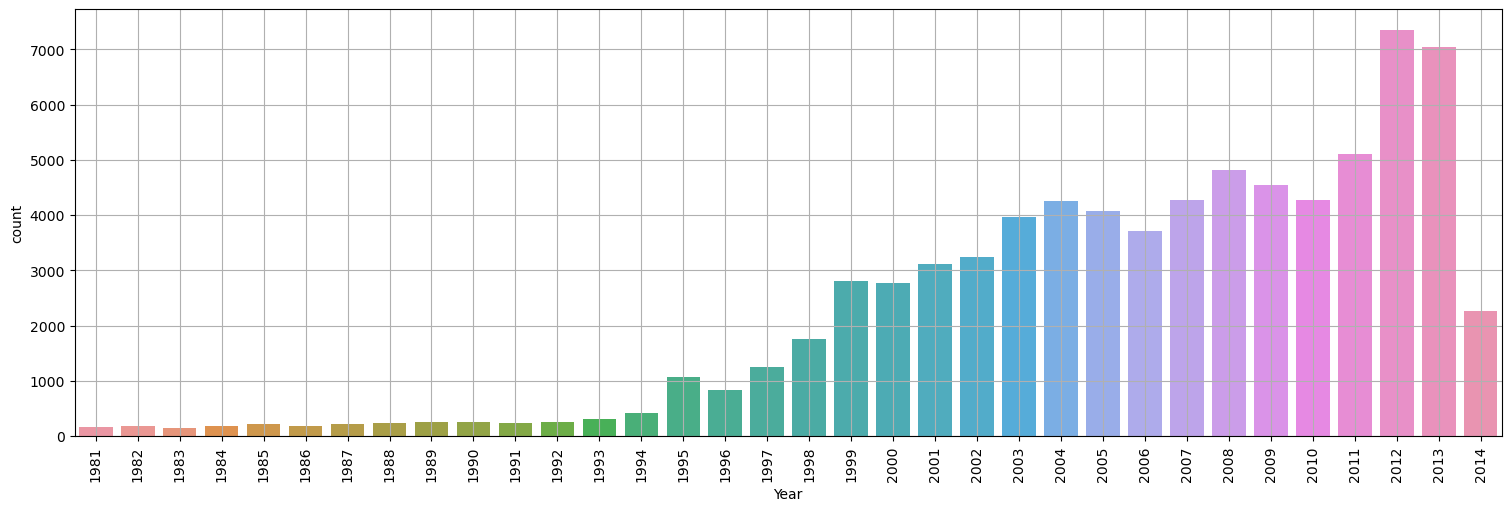

In [81]:
fig, ax = plt.subplots(figsize=(15,5), constrained_layout=True)
sns.countplot(data=df[df.year>1980], x='year');
ax.set_xlabel("Year");
plt.xticks(rotation=90);
ax.grid()

In [82]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,month,day
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949,10,10
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949,10,10
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955,10,10
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956,10,10
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960,10,10


### Which day of the month has the highest number of UFO sightings?

In [83]:
df.day.value_counts()

15    5968
1     5586
4     3128
20    3046
10    2912
12    2588
30    2572
13    2489
5     2488
14    2456
25    2429
16    2424
7     2399
19    2357
3     2352
6     2322
22    2317
11    2310
24    2303
8     2302
18    2291
17    2287
23    2285
28    2283
21    2240
2     2194
9     2182
26    2045
27    2042
29    1997
31    1738
Name: day, dtype: int64

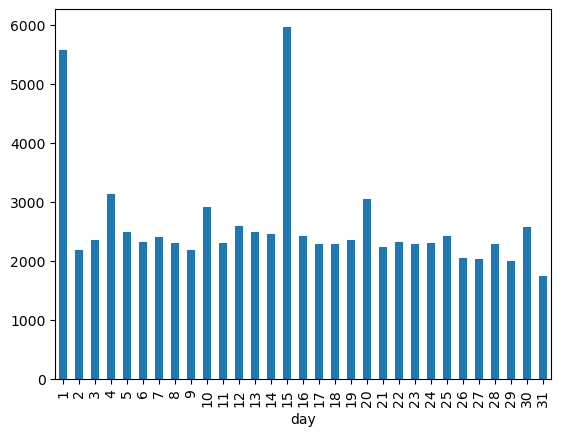

In [102]:
df.groupby('day')['day'].count().plot(kind='bar');

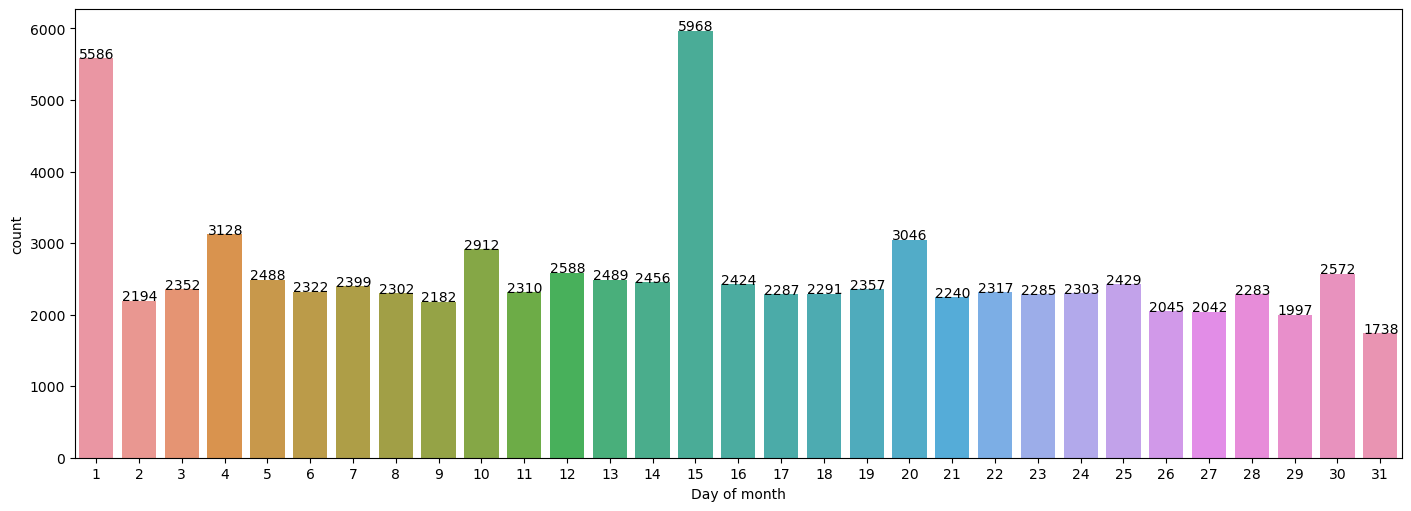

In [105]:
fig, ax = plt.subplots(figsize=(14,5), constrained_layout=True)

sns.countplot(data=df, x='day');

ax.set_xlabel("Day of month");

for p in ax.patches:
    ax.annotate(
        p.get_height(),  
        (p.get_x(), p.get_height())
    );

### Which month of the year has the highest number of UFO sightings?

In [106]:
df.month.value_counts()

7     9520
8     8636
6     8152
9     7589
10    7407
11    6739
1     5689
12    5665
4     5527
3     5450
5     5293
2     4665
Name: month, dtype: int64

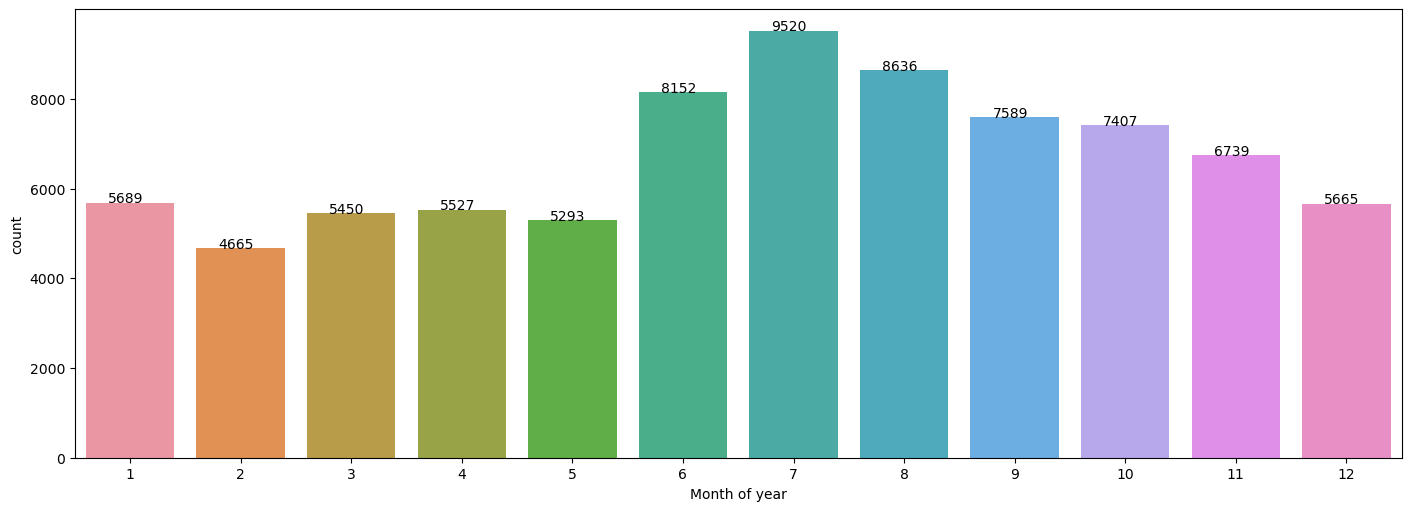

In [110]:
fig, ax = plt.subplots(figsize=(14,5), constrained_layout=True)

sns.countplot(data=df, x='month');

ax.set_xlabel("Month of year");

for p in ax.patches:
    ax.annotate(
        p.get_height(),
        (p.get_x()+0.2, p.get_height())
    );

### Which country has the highest number of UFO sightings?

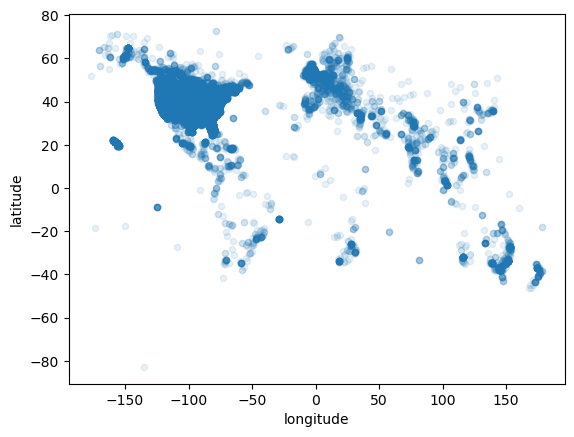

In [111]:
df.plot('longitude', 'latitude', kind='scatter', alpha=0.1);
# there are other tools more approriate for geographical plotting that we will not cover here. 

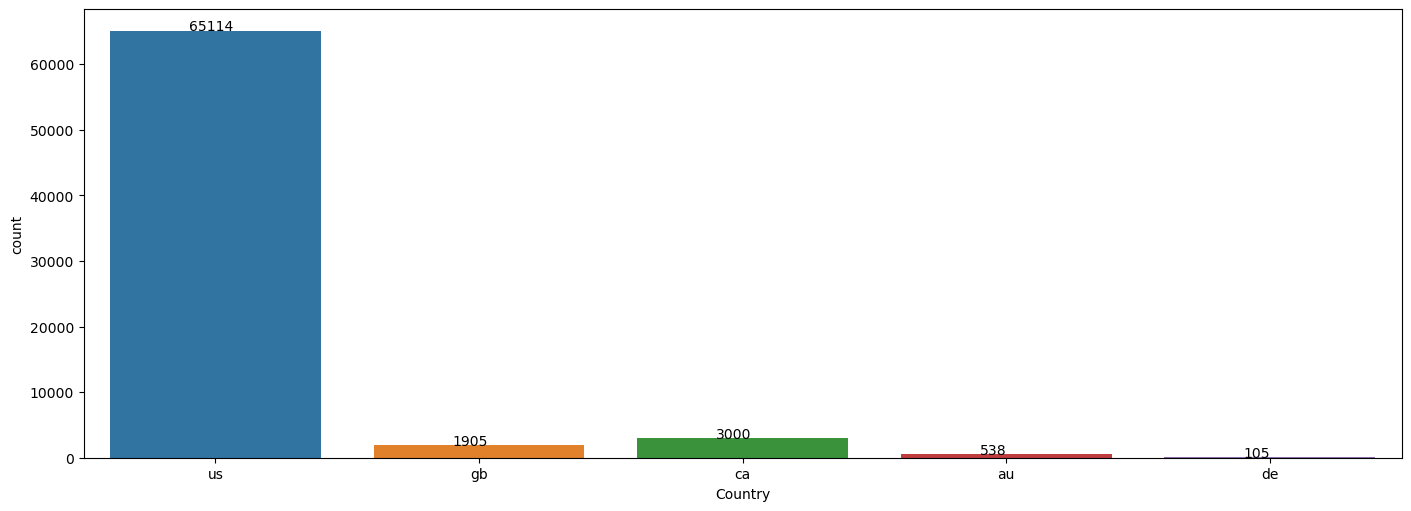

In [114]:
fig, ax = plt.subplots(figsize=(14, 5), constrained_layout=True)

sns.countplot(data=df, x='country')

ax.set_xlabel("Country")

for p in ax.patches:
    ax.annotate(
        p.get_height(),  
        (p.get_x()+0.3, p.get_height())
    )
    
plt.show()

### Are there overall trend differences by country?

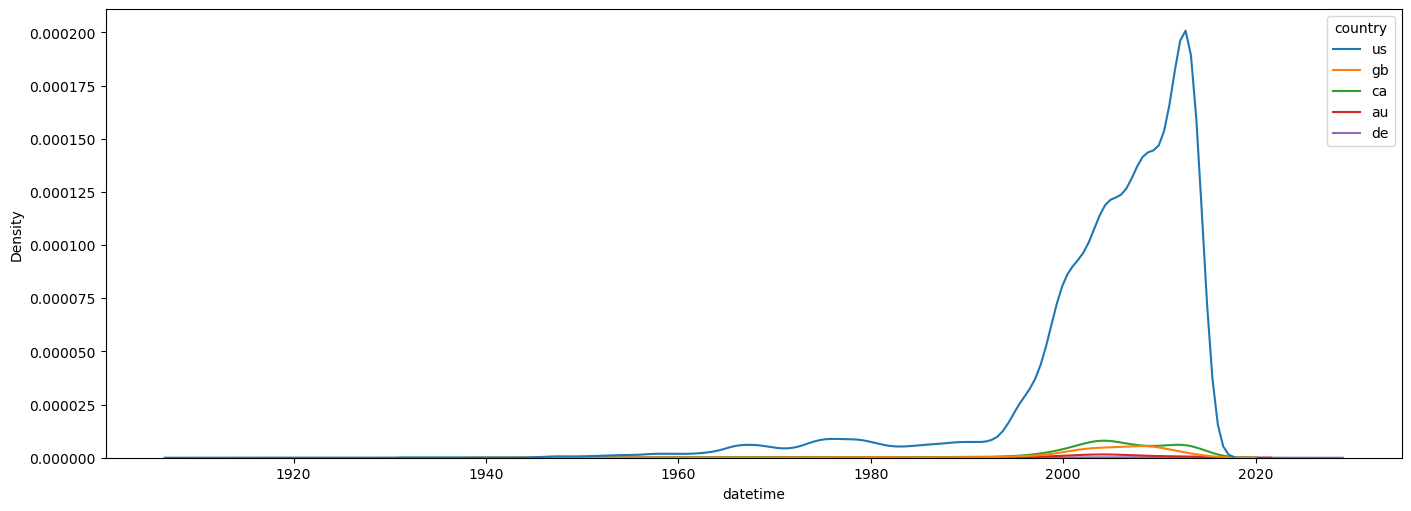

In [115]:
fig, ax = plt.subplots(figsize=(14,5), constrained_layout=True)
sns.kdeplot(data=df, x='datetime', hue='country');

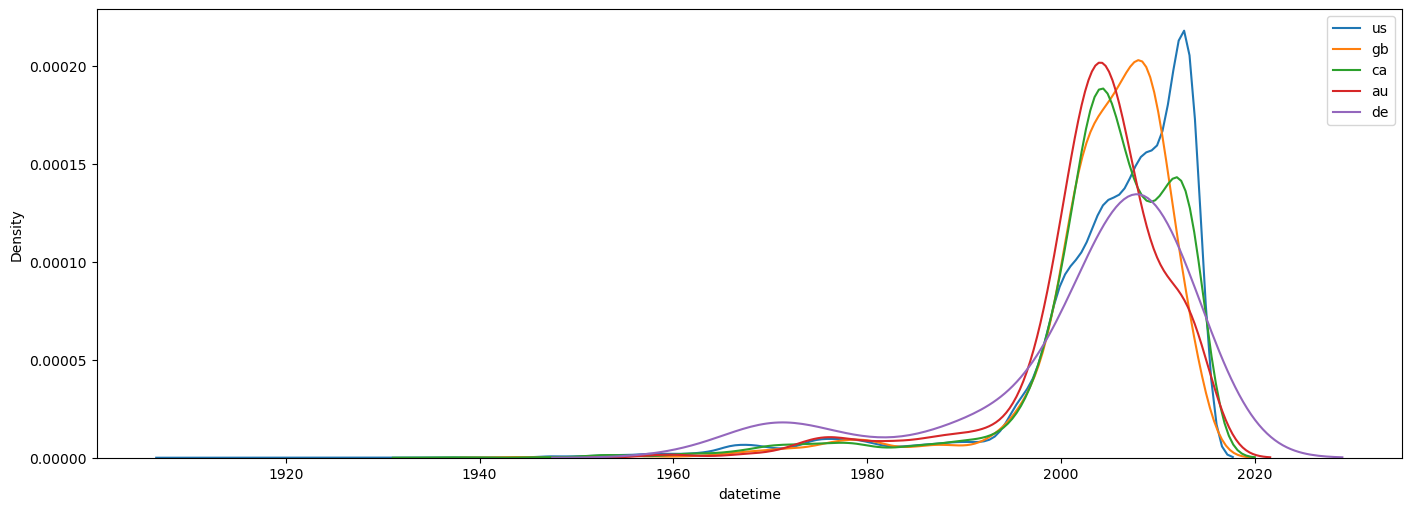

In [117]:
fig, ax = plt.subplots(figsize=(14,5), constrained_layout=True)
for c in df['country'].unique():
    sns.kdeplot(data=df[df.country==c], x='datetime', label=c, ax=ax);
ax.legend();

In [133]:
df_1990 = df[df.year>1989]

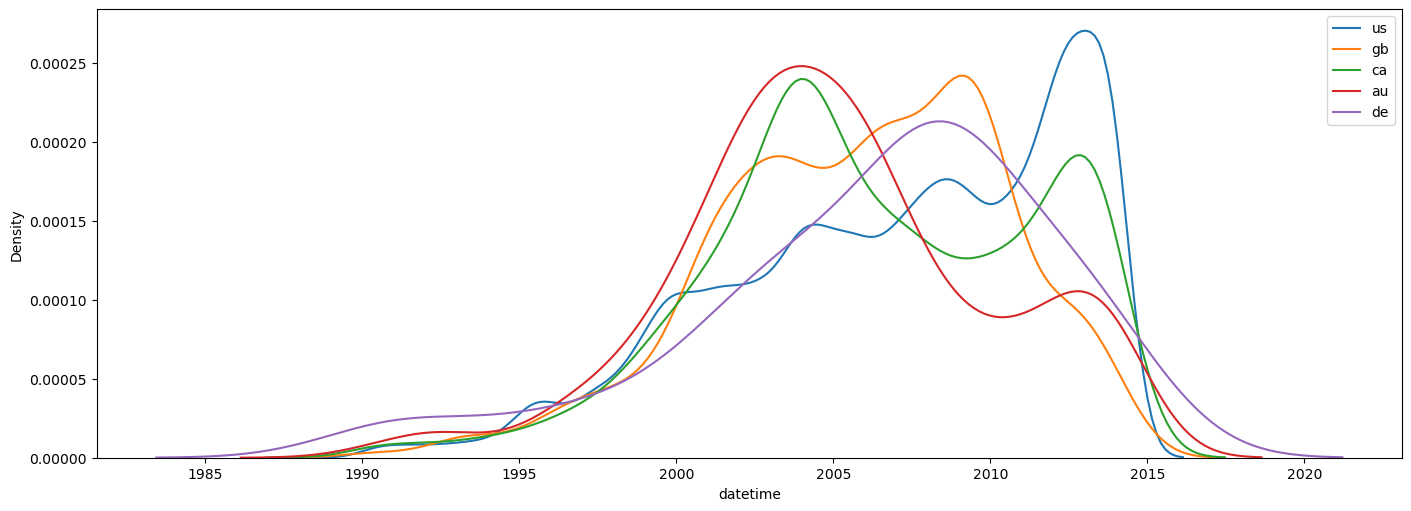

In [134]:
fig, ax = plt.subplots(figsize=(14,5), constrained_layout=True)
for c in df['country'].unique():
    sns.kdeplot(data=df_1990[df_1990['country']==c], x='datetime', label=c, ax=ax);
ax.legend();

It's your turn!

What other insights can you find with this dataset or another dataset you chose? 